In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plcol

In [ ]:
def prop_distrib(sigm, delta, sigma0):
    var = delta**2
    p = np.exp(- 0.5 * (sigm - sigma0)**2 / var) / np.sqrt(2 * np.pi * var)
    return p

In [ ]:
def std_ModelA(T_sigma, T0, delta0):
    return np.sqrt(T0 / T_sigma) * delta0

In [ ]:
delta0 = 0.2
sigma0 = 1.0
T0 = 1.0
lambd = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

colors = np.zeros((np.size(lambd), 3))
colors[0, :] = (5, 48, 97)
colors[1, :] = (106, 90, 205)
colors[2, :] = (50, 147, 200)
colors[3, :] = (90, 170, 90)
colors[4, :] = (250, 140, 70)
colors[5, :] = (215, 48, 39)
colors[6, :] = (103, 0, 31)
colors = colors / 255

grey = (128 / 255, 128 / 255, 128 / 255)

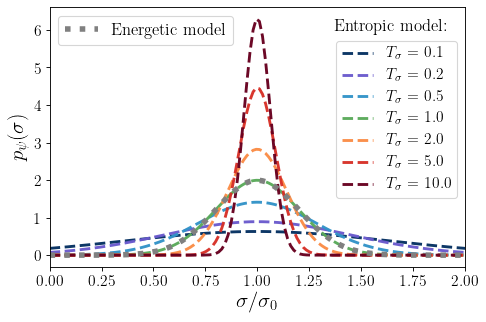

In [ ]:
deltaB = delta0
deltaA = np.zeros(np.size(lambd))

sigma = np.linspace(0, 3, 200)
pA = np.zeros((np.size(lambd), np.size(sigma)))
pB = prop_distrib(sigma, deltaB)

plt.figure(figsize=(6.7, 4.3), dpi=80)
#plt.plot(sigma, pB,'--', label=r'Model B', linewidth=4.5, color=grey)
for i in range (np.size(lambd)):
    deltaA[i] = std_ModelA(lambd[i], T0, delta0)
    pA[i] = prop_distrib(sigma, deltaA[i], sigma0)
    
line1, =  plt.plot(sigma, pA[0],'--', label=r'$T_\sigma$ = {0}'.format(lambd[0]), color=colors[0],
                   linewidth=2.57, alpha=0.97)
line2, =  plt.plot(sigma, pA[1],'--', label=r'$T_\sigma$ = {0}'.format(lambd[1]), color=colors[1],
                   linewidth=2.57, alpha=0.97)
line3, =  plt.plot(sigma, pA[2],'--', label=r'$T_\sigma$ = {0}'.format(lambd[2]), color=colors[2],
                   linewidth=2.57, alpha=0.97)
line4, =  plt.plot(sigma, pA[3],'--', label=r'$T_\sigma$ = {0}'.format(lambd[3]), color=colors[3],
                   linewidth=2.57, alpha=0.97)
line5, =  plt.plot(sigma, pA[4],'--', label=r'$T_\sigma$ = {0}'.format(lambd[4]), color=colors[4],
                   linewidth=2.57, alpha=0.97)
line6, =  plt.plot(sigma, pA[5],'--', label=r'$T_\sigma$ = {0}'.format(lambd[5]), color=colors[5],
                   linewidth=2.57, alpha=0.97)
line7, =  plt.plot(sigma, pA[6],'--', label=r'$T_\sigma$ = {0}'.format(lambd[6]), color=colors[6],
                   linewidth=2.57, alpha=0.97)
line_ener, = plt.plot(sigma, pB,':', label=r'Energetic model', linewidth=5, color=grey,alpha=1.0)

plt.xlabel('$\sigma / \sigma_0$', fontsize=19)
plt.ylabel('$p_\psi (\sigma)$', fontsize=19)
plt.xlim(0, 2)
plt.text(1.37, 5.97, 'Entropic model:', fontsize=15)
legend1 = plt.legend(handles=[line_ener], fontsize=15, loc="upper left")
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=[line1, line2, line3, line4, line5, line6, line7], 
                     fontsize=14, bbox_to_anchor=(0.0, 0.90, 1.0, .00), loc='upper right')
#plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('sim_psigma.pdf', bbox_inches='tight')
plt.show()